In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset_path = '/content/drive/My Drive/Colab Notebooks/Apple_Leaf_Disease'

In [3]:
print("Dataset Path:", dataset_path)

Dataset Path: /content/drive/My Drive/Colab Notebooks/Apple_Leaf_Disease


In [4]:
import os
import pandas as pd
from datetime import datetime

# Set your dataset path
dataset_path = '/content/drive/My Drive/Colab Notebooks/Apple_Leaf_Disease'

# Get the list of class folders
classes = sorted(os.listdir(dataset_path))

# Prepare list to hold metadata
data = []

# Loop through each class folder
for cls in classes:
    class_folder = os.path.join(dataset_path, cls)
    if not os.path.isdir(class_folder):
        continue
    # Loop through each image in the folder
    for img_file in os.listdir(class_folder):
        if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(class_folder, img_file)
            # Assign default values for date and region; later update manually if needed
            default_date = datetime.now().strftime("%Y-%m-%d")
            default_region = "Unknown"  # Change this if you know the region for the images
            data.append({
                "image_path": image_path,
                "date": default_date,
                "region": default_region,
                "label": cls
            })

# Create DataFrame and save to CSV
image_info_df = pd.DataFrame(data)
# changed path to save in /content/drive/My Drive/Colab Notebooks/image_info.csv
image_info_df.to_csv("/content/drive/My Drive/Colab Notebooks/image_info.csv", index=False)
print("image_info.csv created successfully!")

image_info.csv created successfully!


In [5]:
import pandas as pd
# Load the image_info.csv file
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/image_info.csv")
# Display the first five rows
print(df.head())

                                          image_path        date   region  \
0  /content/drive/My Drive/Colab Notebooks/Apple_...  2025-03-24  Unknown   
1  /content/drive/My Drive/Colab Notebooks/Apple_...  2025-03-24  Unknown   
2  /content/drive/My Drive/Colab Notebooks/Apple_...  2025-03-24  Unknown   
3  /content/drive/My Drive/Colab Notebooks/Apple_...  2025-03-24  Unknown   
4  /content/drive/My Drive/Colab Notebooks/Apple_...  2025-03-24  Unknown   

                  label  
0  Alternaria leaf spot  
1  Alternaria leaf spot  
2  Alternaria leaf spot  
3  Alternaria leaf spot  
4  Alternaria leaf spot  


In [6]:
import requests
import pandas as pd
import datetime

def fetch_weather(city, country, api_key):
    URL = f"http://api.openweathermap.org/data/2.5/weather?q={city},{country}&appid={api_key}&units=metric"
    response = requests.get(URL)
    data = response.json()

    if response.status_code == 200:
        weather_info = {
            "date": datetime.datetime.now().strftime("%Y-%m-%d"),
            "region": city,
            "temperature": data["main"]["temp"],
            "humidity": data["main"]["humidity"],
            "wind_speed": data["wind"]["speed"],
            "rainfall": data.get("rain", {}).get("1h", 0)  # Default to 0 if missing
        }
        return weather_info
    else:
        print(f"Error fetching weather for {city}, {country}: {data.get('message', 'Unknown error')}")
        return None

# Replace with your actual API key
API_KEY = "e2986cca3557e4da8875c3a3a952bf1f"

# Define regions to collect weather data
regions = [("Shimla", "IN"), ("Washington", "US"), ("Shaanxi", "CN")]

# Fetch weather data for all locations
weather_records = []
for city, country in regions:
    record = fetch_weather(city, country, API_KEY)
    if record:
        weather_records.append(record)

# Save to CSV
weather_df = pd.DataFrame(weather_records)
weather_df.to_csv("/content/drive/My Drive/Colab Notebooks/weather_data.csv", index=False)
print("weather_data.csv created successfully!")


weather_data.csv created successfully!


In [7]:
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/weather_data.csv")
print(df.head())

         date      region  temperature  humidity  wind_speed  rainfall
0  2025-03-24      Shimla        10.67        36        2.49         0
1  2025-03-24  Washington        10.05        83        1.44         0
2  2025-03-24     Shaanxi        13.38        27        1.88         0


In [11]:
# Load both CSV files
image_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/image_info.csv")
weather_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/weather_data.csv")

# Merge on 'date' and 'region'
merged_df = pd.merge(image_df, weather_df, on=["date", "region"], how="left")

# Save the merged dataset
merged_df.to_csv("/content/drive/My Drive/Colab Notebooks/merged_dataset.csv", index=False)
print(" Merged dataset saved successfully!")


 Merged dataset saved successfully!


In [8]:
import torch
from torchvision import transforms
from PIL import Image
import pandas as pd

# Load the merged CSV
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/merged_dataset.csv")

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.ToTensor(),          # Convert to tensor
])

# Function to load an image and its corresponding weather data
def load_data(index):
    row = df.iloc[index]

    # Load and preprocess the image
    image_path = row["image_path"]
    image = Image.open(image_path).convert("RGB")
    image = transform(image)

    # Extract weather features (as tensor)
    weather_features = torch.tensor([
        row["temperature"],
        row["humidity"],
        row["rainfall"],
        row["wind_speed"]
    ], dtype=torch.float32)

    # Get label (disease class index)
    label = row["label"]

    return image, weather_features, label

# Example usage: Load first image and weather data
img, weather, label = load_data(0)

print("Image Shape:", img.shape)  # Should be (3, 224, 224)
print("Weather Data:", weather)   # Tensor of 4 values
print("Label:", label)


Image Shape: torch.Size([3, 224, 224])
Weather Data: tensor([nan, nan, nan, nan])
Label: Alternaria leaf spot


In [9]:
import pandas as pd

# Load the merged dataset
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/merged_dataset.csv")

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Display dataset information
print("\nDataset Info:")
print(df.info())

# Display a few rows to verify the data
print(df.head())


Missing values:
 image_path        0
date              0
region            0
label             0
temperature    1641
humidity       1641
wind_speed     1641
rainfall       1641
dtype: int64

Number of duplicate rows: 0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1641 entries, 0 to 1640
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   image_path   1641 non-null   object 
 1   date         1641 non-null   object 
 2   region       1641 non-null   object 
 3   label        1641 non-null   object 
 4   temperature  0 non-null      float64
 5   humidity     0 non-null      float64
 6   wind_speed   0 non-null      float64
 7   rainfall     0 non-null      float64
dtypes: float64(4), object(4)
memory usage: 102.7+ KB
None
                                          image_path        date   region  \
0  /content/drive/My Drive/Colab Notebooks/Apple_...  2025-03-24  Unknown   
1  /content/drive/My Drive/

In [12]:
# Check unique values in both datasets before merging
print("Unique regions in merged_df:", merged_df['region'].unique())
print("Unique regions in weather_df:", weather_df['region'].unique())

# Check for unmatched regions
unmatched_regions = merged_df[~merged_df['region'].isin(weather_df['region'])]
print("Rows with unmatched regions:")
print(unmatched_regions.head())

# Check if date format is the same
print("Merged Dataset Date Example:", merged_df['date'].head(5))
print("Weather Dataset Date Example:", weather_df['date'].head(5))

# Ensure date format is consistent
weather_df['date'] = pd.to_datetime(weather_df['date'], format='%Y-%m-%d')
merged_df['date'] = pd.to_datetime(merged_df['date'], format='%Y-%m-%d')

# Try merging again
merged_df = merged_df.merge(weather_df, on=['date', 'region'], how='left')

# Check for missing values again
print("Missing values after fixing merge issues:")
print(merged_df.isnull().sum())


Unique regions in merged_df: ['Unknown']
Unique regions in weather_df: ['Shimla' 'Washington' 'Shaanxi']
Rows with unmatched regions:
                                          image_path        date   region  \
0  /content/drive/My Drive/Colab Notebooks/Apple_...  2025-03-24  Unknown   
1  /content/drive/My Drive/Colab Notebooks/Apple_...  2025-03-24  Unknown   
2  /content/drive/My Drive/Colab Notebooks/Apple_...  2025-03-24  Unknown   
3  /content/drive/My Drive/Colab Notebooks/Apple_...  2025-03-24  Unknown   
4  /content/drive/My Drive/Colab Notebooks/Apple_...  2025-03-24  Unknown   

                  label  temperature  humidity  wind_speed  rainfall  
0  Alternaria leaf spot          NaN       NaN         NaN       NaN  
1  Alternaria leaf spot          NaN       NaN         NaN       NaN  
2  Alternaria leaf spot          NaN       NaN         NaN       NaN  
3  Alternaria leaf spot          NaN       NaN         NaN       NaN  
4  Alternaria leaf spot          NaN       NaN  

In [13]:
merged_df = merged_df.drop(columns=['temperature', 'humidity', 'wind_speed', 'rainfall'], errors='ignore')
merged_df = merged_df.merge(weather_df, on='date', how='left')

In [14]:
merged_df.fillna(method='ffill', inplace=True)  # Forward fill
merged_df.fillna(method='bfill', inplace=True)  # Backward fill

<ipython-input-14-59dc18fa4511>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)  # Forward fill
<ipython-input-14-59dc18fa4511>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='bfill', inplace=True)  # Backward fill


In [15]:
merged_df.fillna({'temperature': 20, 'humidity': 50, 'wind_speed': 2, 'rainfall': 0}, inplace=True)

In [22]:

merged_df.drop(columns=['temperature_x', 'humidity_x', 'wind_speed_x', 'rainfall_x',
                        'temperature_y', 'humidity_y', 'wind_speed_y', 'rainfall_y'],
               inplace=True, errors='ignore')


In [26]:
print(merged_df.isnull().sum())


image_path        0
date              0
region            0
label             0
temperature    1641
humidity       1641
wind_speed     1641
rainfall       1641
dtype: int64


In [25]:
# Load both CSV files
image_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/image_info.csv")
weather_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/weather_data.csv")

# Ensure 'date' columns are in the same format
image_df['date'] = pd.to_datetime(image_df['date']).dt.strftime('%Y-%m-%d')
weather_df['date'] = pd.to_datetime(weather_df['date']).dt.strftime('%Y-%m-%d')

# Merge on 'date' and 'region'
merged_df = pd.merge(image_df, weather_df, on=["date", "region"], how="left")

# Check if 'region' is in merged_df
if 'region' not in merged_df.columns:
    print("Warning: 'region' column is missing in merged_df. Check your previous data manipulations.")
else:
    # Save the merged dataset
    merged_df.to_csv("/content/drive/My Drive/Colab Notebooks/merged_dataset.csv", index=False)
    print(" Merged dataset saved successfully!")

 Merged dataset saved successfully!


In [24]:
merged_df = merged_df.merge(weather_df, on=['date', 'region'], how='left')


KeyError: 'region'

In [ ]:
# Find the most common region in weather data
most_common_region = weather_df["region"].mode()[0]

# Replace 'Unknown' with the most common region
image_info_df["region"] = image_info_df["region"].replace("Unknown", most_common_region)

# Save the updated file
image_info_df.to_csv("/content/drive/My Drive/Colab Notebooks/image_info_updated.csv", index=False)


In [ ]:
# Convert both dates to the same format
image_info_df["date"] = pd.to_datetime(image_info_df["date"]).dt.strftime('%Y-%m-%d')
weather_df["date"] = pd.to_datetime(weather_df["date"]).dt.strftime('%Y-%m-%d')


In [ ]:
# Reload datasets
image_info_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/image_info_updated.csv")
weather_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/weather_data.csv")

# Merge on 'date' and 'region' again
merged_df = pd.merge(image_info_df, weather_df, on=['date', 'region'], how='left')

# Save the new merged file
merged_df.to_csv("/content/drive/My Drive/Colab Notebooks/merged_data_fixed.csv", index=False)

print("Re-merging complete! Check for missing values again.")


Re-merging complete! Check for missing values again.


In [ ]:
print(merged_df.isnull().sum())

image_path     0
date           0
region         0
label          0
temperature    0
humidity       0
wind_speed     0
rainfall       0
dtype: int64


<ipython-input-51-4ed9ba0e1ef0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y='temperature', data=merged_df, palette='Set2')


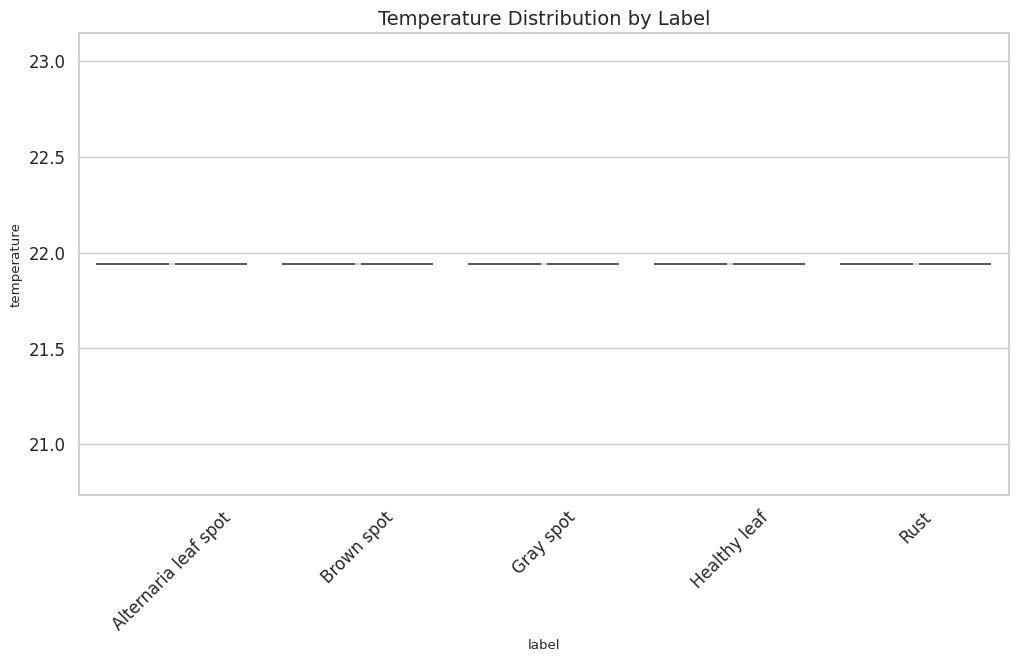

<ipython-input-51-4ed9ba0e1ef0>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y='humidity', data=merged_df, palette='Set2')


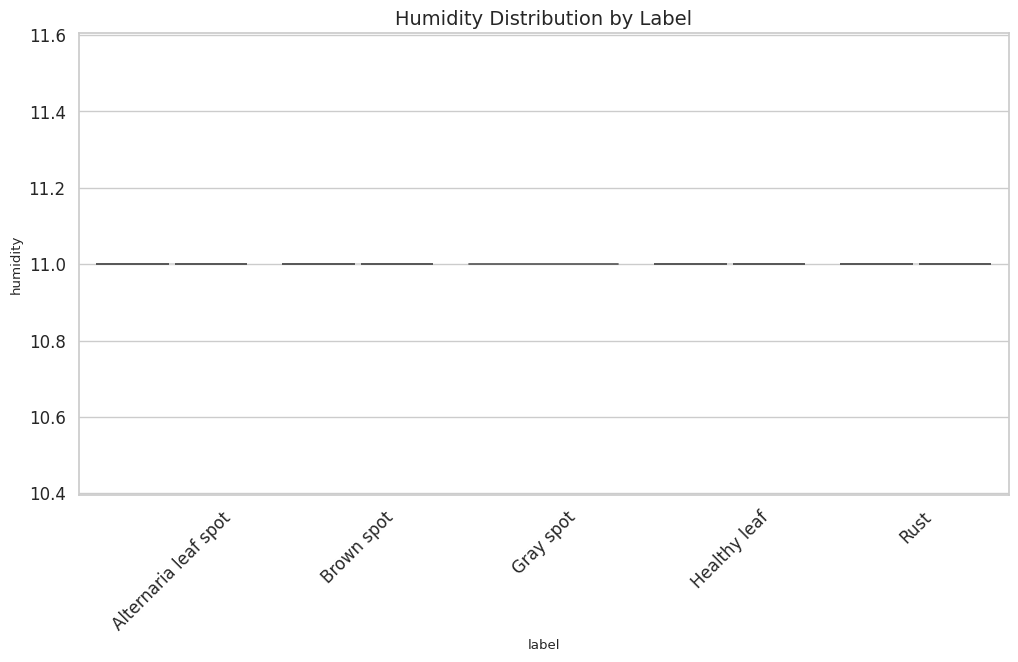

<ipython-input-51-4ed9ba0e1ef0>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='wind_speed', data=merged_df, palette='Set2')


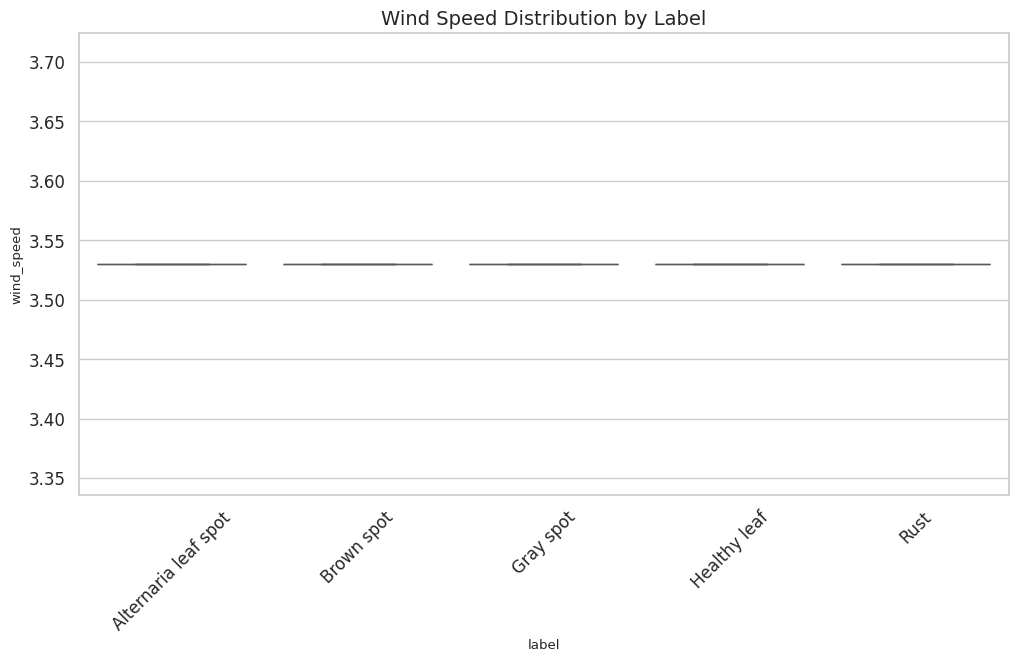

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set font size for all elements
sns.set_context("notebook", font_scale=0.8)  # Smaller font size

# Violin plot for temperature vs label
plt.figure(figsize=(12, 6))
sns.violinplot(x='label', y='temperature', data=merged_df, palette='Set2')
plt.title('Temperature Distribution by Label', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Smaller font size for x-axis labels
plt.yticks(fontsize=12)  # Smaller font size for y-axis labels
plt.show()

# Violin plot for humidity vs label
plt.figure(figsize=(12, 6))
sns.violinplot(x='label', y='humidity', data=merged_df, palette='Set2')
plt.title('Humidity Distribution by Label', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Box plot for wind_speed vs label
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='wind_speed', data=merged_df, palette='Set2')
plt.title('Wind Speed Distribution by Label', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


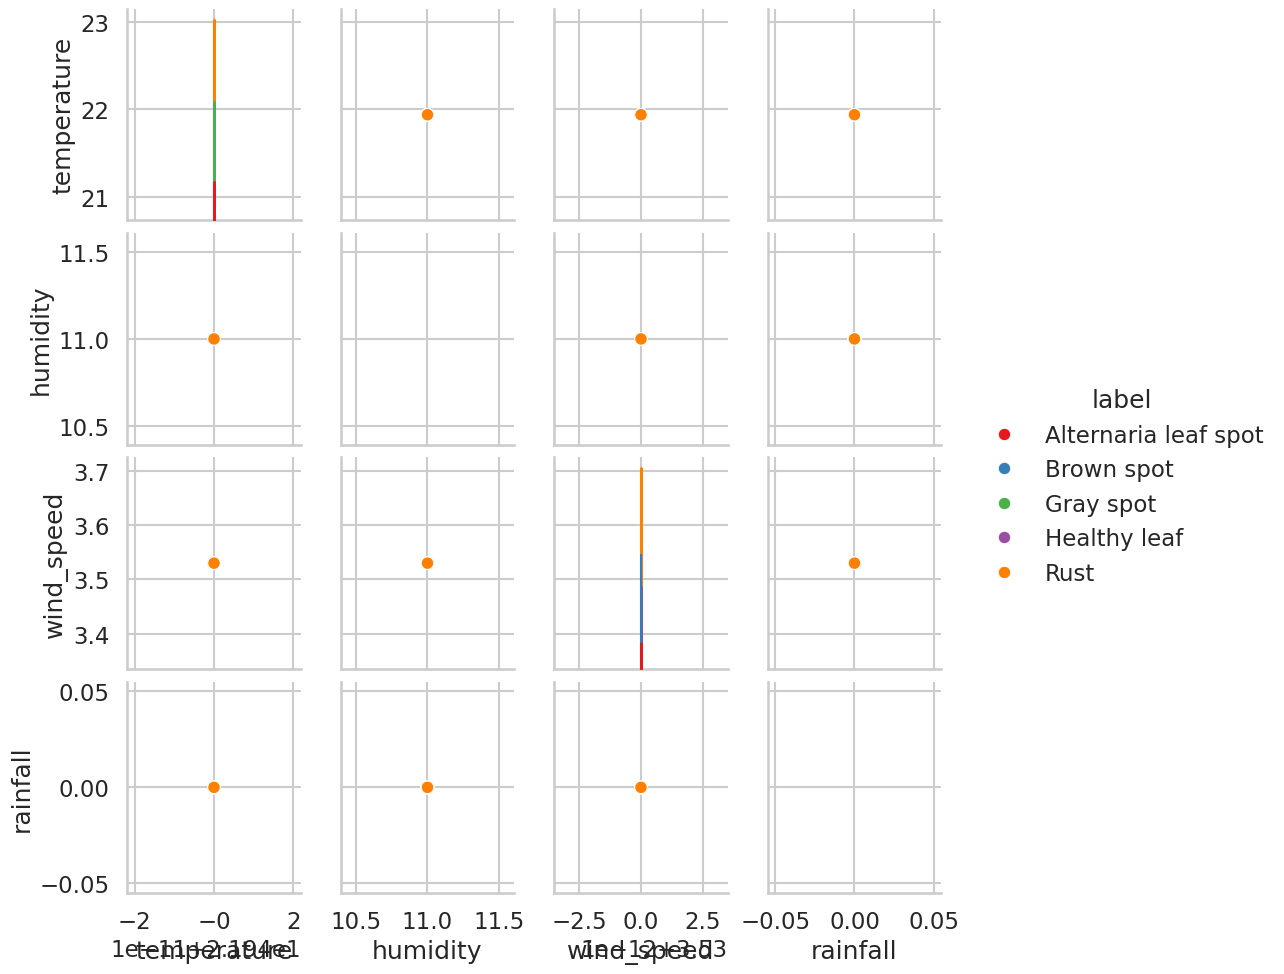

In [ ]:
# Pairplot to show relationships between temperature, humidity, wind_speed, and rainfall
# Include the 'label' column in the DataFrame passed to pairplot
sns.pairplot(merged_df[['temperature', 'humidity', 'wind_speed', 'rainfall', 'label']], hue='label', palette='Set1')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


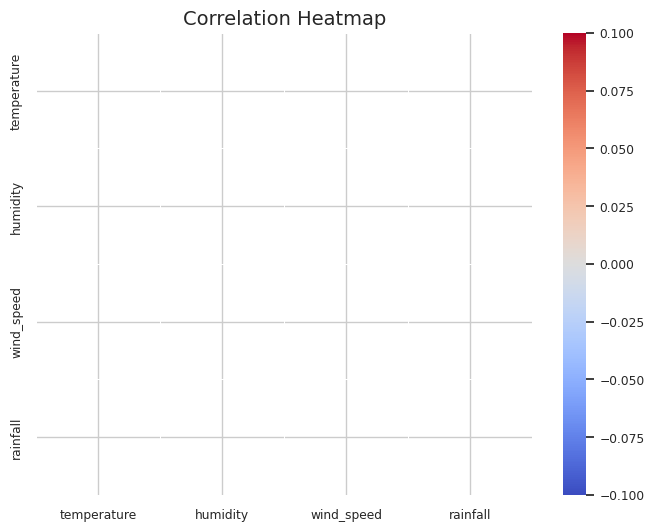

In [ ]:
# If you have numeric columns, you can include them in the correlation matrix
# Example: Merging numeric data or adding more columns would allow correlation analysis

# Example of encoded label correlation with numeric columns if available
merged_df['label_encoded'] = label_encoder.fit_transform(merged_df['label'])

# Plot the correlation heatmap
numeric_columns = ['label_encoded', 'temperature', 'humidity', 'wind_speed', 'rainfall']  # Example, update if necessary
corr = merged_df[numeric_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={'size': 10})
plt.title('Correlation Heatmap (with Encoded Label)', fontsize=14)
plt.show()



In [ ]:
# Check for columns that have only NaN values
print(merged_df.isna().sum())



image_path     0
date           0
region         0
label          0
temperature    0
humidity       0
wind_speed     0
rainfall       0
dtype: int64


temperature    0
humidity       0
wind_speed     0
rainfall       0
dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


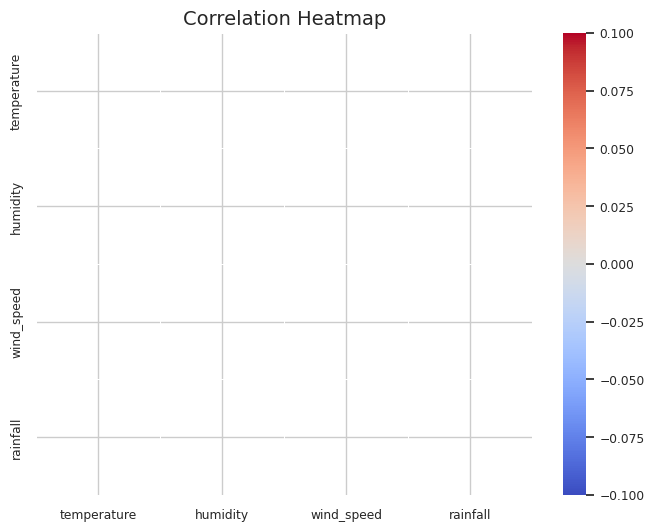

In [ ]:
# Select only numeric columns for correlation analysis
numeric_df = merged_df[['temperature', 'humidity', 'wind_speed', 'rainfall']]

# Check for NaN values in the selected numeric columns
print(numeric_df.isna().sum())

# Recalculate the correlation matrix on the numeric columns
corr = numeric_df.corr()

# Plot the heatmap again
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={'size': 10})
plt.title('Correlation Heatmap', fontsize=14)
plt.show()


In [ ]:
# Check unique values in each of the numeric columns
print(merged_df['temperature'].unique())
print(merged_df['humidity'].unique())
print(merged_df['wind_speed'].unique())
print(merged_df['rainfall'].unique())


[21.94]
[11]
[3.53]
[0]


In [ ]:
# Check the variance of each numeric column
print(merged_df[['temperature', 'humidity', 'wind_speed', 'rainfall']].var())


temperature    9.780262e-26
humidity       0.000000e+00
wind_speed     1.547110e-28
rainfall       0.000000e+00
dtype: float64


In [ ]:
# Drop columns with no variation
merged_df = merged_df.drop(columns=['temperature', 'humidity', 'wind_speed', 'rainfall'])


In [ ]:
# Select the remaining numeric columns for correlation
numeric_df = merged_df.select_dtypes(include=['number'])  # Include all numeric types
# Check if numeric_df has any columns
if numeric_df.empty:
    print("No numeric columns found for correlation analysis.")
else:
    corr = numeric_df.corr()
    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={'size': 10})
    plt.title('Correlation Heatmap', fontsize=14)
    plt.show()


No numeric columns found for correlation analysis.


In [ ]:
# Check remaining columns after dropping
print(merged_df.columns)


Index(['image_path', 'date', 'region', 'label'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'label' column
label_encoder = LabelEncoder()
merged_df['label_encoded'] = label_encoder.fit_transform(merged_df['label'])

# Check the unique values in the encoded 'label' column
print(merged_df['label_encoded'].unique())


[0 1 2 3 4]


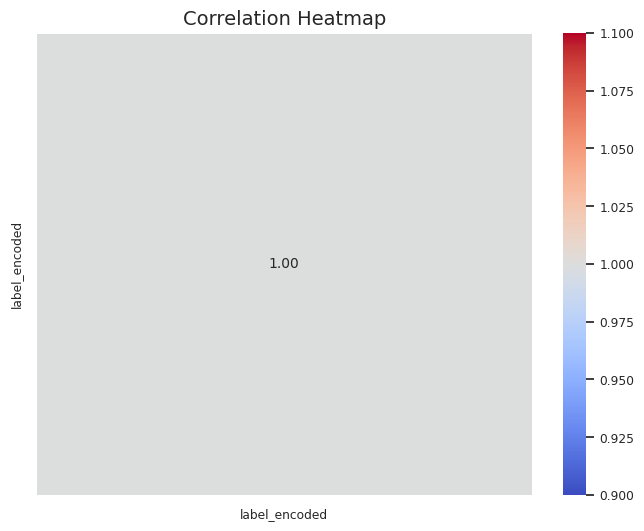

In [ ]:
# Now calculate correlation (if any numeric columns exist)
corr = merged_df[['label_encoded']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={'size': 10})
plt.title('Correlation Heatmap', fontsize=14)
plt.show()
